# 🥁 Day 7: The Beat Machine
## Caribbean Rhythm Programming Lab

**Welcome to the Beat Laboratory!** Today you'll learn to program rhythms like a pro, create authentic Caribbean beats, and build the rhythmic foundation for your cultural multimedia project.

### 🎯 **Lab Goals:**
- Master digital drum programming
- Create authentic Caribbean rhythm patterns
- Build dynamic beat arrangements
- Develop your signature musical style

### 🥁 **What You'll Build:**
- Digital drum machine
- Caribbean rhythm patterns (Calypso, Soca, Reggae)
- Signature beat with steel pan elements
- Professional-quality rhythm tracks

**Let's make some beats that make people dance!** 💃🕺✨

In [1]:
# 🥁 BEAT LABORATORY SETUP
# Install and import everything we need for rhythm programming!

print("🎵 Setting up your Beat Laboratory...")

# Core audio libraries
from pydub import AudioSegment
from pydub.generators import Sine, Sawtooth, Square, Triangle, WhiteNoise
from pydub.playback import play
from pydub.effects import normalize, compress_dynamic_range

# For beat programming and visualization
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import Audio, display
import io
import time

print("✅ Beat programming superpowers activated!")
print("🥁 Ready to create Caribbean rhythms!")

# Test with a simple kick drum
test_kick = Sine(70).to_audio_segment(duration=300).apply_gain(-8)
print("🔊 Beat lab ready - let's make some noise!")

🎵 Setting up your Beat Laboratory...
✅ Beat programming superpowers activated!
🥁 Ready to create Caribbean rhythms!
🔊 Beat lab ready - let's make some noise!


In [2]:
# 🎧 ENHANCED AUDIO PLAYBACK SYSTEM
# Better audio controls for our beat laboratory!

def play_beat(audio_segment, title="Beat", show_waveform=True):
    """Play beats with enhanced controls and optional waveform display"""
    print(f"🥁 Playing: {title}")
    print(f"⏱️ Duration: {len(audio_segment)/1000:.1f} seconds")
    print(f"🔊 Peak volume: {audio_segment.max_dBFS:.1f} dBFS")
    
    # Convert to WAV for playback
    wav_io = io.BytesIO()
    audio_segment.export(wav_io, format="wav")
    wav_io.seek(0)
    
    # Display audio widget
    audio_widget = Audio(wav_io.read(), rate=44100)
    display(audio_widget)
    
    # Optional waveform visualization
    if show_waveform and len(audio_segment) < 10000:  # Only for shorter beats
        samples = np.array(audio_segment.get_array_of_samples())
        if audio_segment.channels == 2:
            samples = samples.reshape((-1, 2))
            samples = samples.mean(axis=1)  # Convert to mono for display
        
        time_axis = np.linspace(0, len(audio_segment)/1000, len(samples))
        
        plt.figure(figsize=(10, 3))
        plt.plot(time_axis, samples, color='#e74c3c', linewidth=1)
        plt.title(f"🌊 Waveform: {title}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    return audio_widget

print("🎧 Enhanced audio playback system ready!")
print("📊 Includes waveform visualization for beat analysis!")

🎧 Enhanced audio playback system ready!
📊 Includes waveform visualization for beat analysis!


## 📚 LESSON 1: Building Your Digital Drum Kit

Every great beat starts with great drum sounds! Let's create our digital drum kit with authentic Caribbean flavors.

### 🥁 **Essential Drum Elements:**
- **Kick Drum:** The heartbeat (60-80 Hz)
- **Snare Drum:** The snap (200-400 Hz + noise)
- **Hi-Hat:** The sizzle (8000+ Hz filtered noise)
- **Steel Pan:** The Caribbean soul (harmonic frequencies)

### 🎵 **Beat Programming Basics:**
- **Pattern:** Sequence of drum hits (usually 8 or 16 steps)
- **BPM:** Beats per minute (tempo)
- **Groove:** The "feel" created by timing and dynamics

Let's build our drum sounds from scratch!

🛠️ Building your digital drum kit...
🥁 Creating kick drum...
🥁 Playing: 🥁 Kick Drum
⏱️ Duration: 0.4 seconds
🔊 Peak volume: -6.0 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


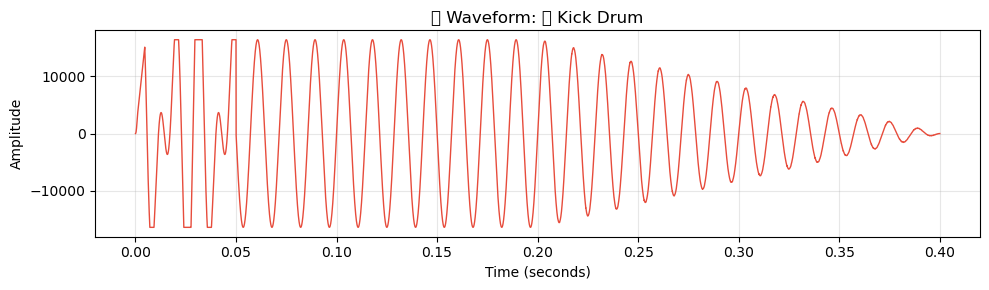


📀 Creating snare drum...
🥁 Playing: 📀 Snare Drum
⏱️ Duration: 0.2 seconds
🔊 Peak volume: -8.0 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 128192 (\N{DVD}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128192 (\N{DVD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


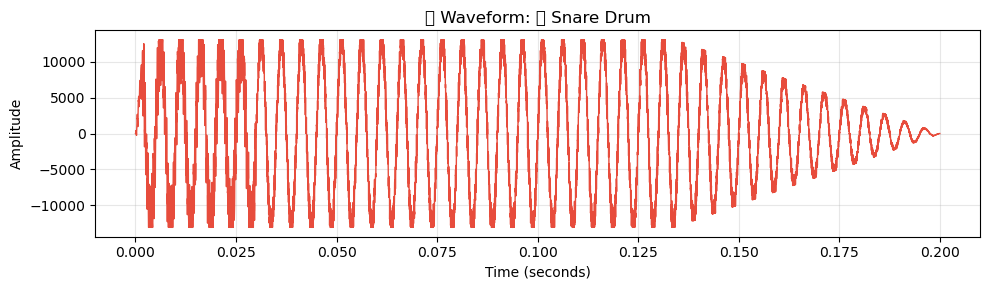


🔔 Creating closed hi-hat...
🥁 Playing: 🔔 Closed Hi-Hat
⏱️ Duration: 0.1 seconds
🔊 Peak volume: -32.0 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 128276 (\N{BELL}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128276 (\N{BELL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


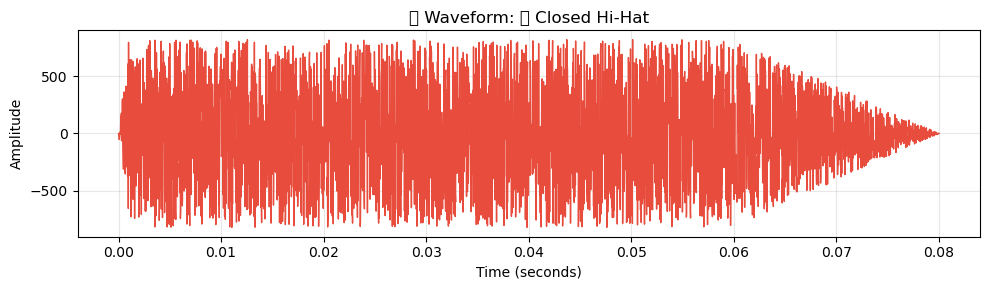


💫 Creating open hi-hat...
🥁 Playing: 💫 Open Hi-Hat
⏱️ Duration: 0.2 seconds
🔊 Peak volume: -32.0 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


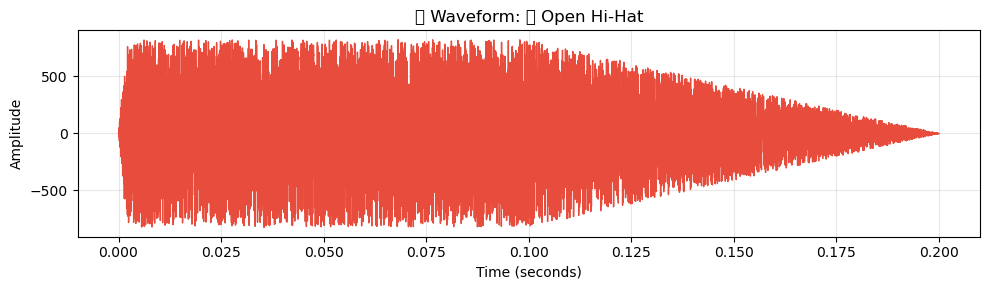


🎵 Creating steel pan hit...
🥁 Playing: 🎵 Steel Pan Hit
⏱️ Duration: 0.3 seconds
🔊 Peak volume: -10.0 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


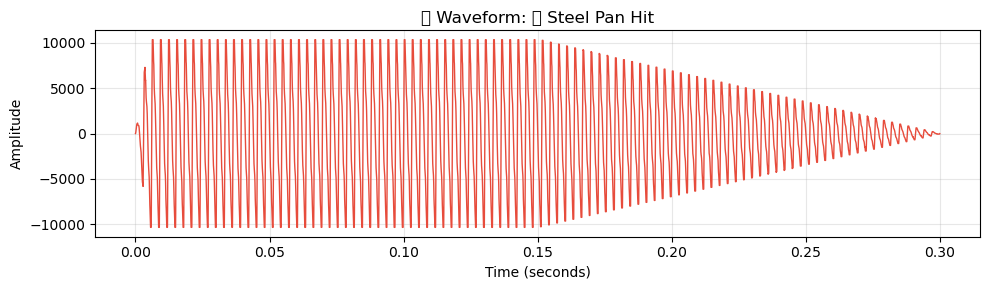


✅ Your digital drum kit is ready!
🎛️ Each drum has its own sonic character and frequency range!
💾 Drum kit saved for beat programming!


In [3]:
# 🥁 DIGITAL DRUM KIT CREATION
# Create authentic drum sounds using audio synthesis!

print("🛠️ Building your digital drum kit...")

def create_kick_drum(frequency=70, duration=400):
    """Create a punchy kick drum sound"""
    # Start with a sine wave for the fundamental
    kick = Sine(frequency).to_audio_segment(duration=duration)
    
    # Add pitch bend for that "thump" effect
    pitch_bend = Sine(frequency * 1.5).to_audio_segment(duration=50)
    kick = kick.overlay(pitch_bend)
    
    # Sharp attack, quick decay envelope
    kick = kick.fade_in(5).fade_out(duration//2)
    
    return kick.apply_gain(-6)  # Reasonable volume

def create_snare_drum(duration=200):
    """Create a snappy snare drum with noise component"""
    # Tone component (around 200Hz)
    tone = Sine(200).to_audio_segment(duration=duration)
    
    # Noise component for the "snare" sound
    noise = WhiteNoise().to_audio_segment(duration=duration).apply_gain(-15)
    
    # High-frequency emphasis for crack
    crack = Sine(3000).to_audio_segment(duration=30).apply_gain(-10)
    
    # Combine components
    snare = tone.overlay(noise).overlay(crack)
    
    # Sharp envelope
    snare = snare.fade_in(2).fade_out(duration//3)
    
    return snare.apply_gain(-8)

def create_hihat(duration=100, open=False):
    """Create hi-hat sounds (closed or open)"""
    # High-frequency filtered white noise
    hihat = WhiteNoise().to_audio_segment(duration=duration).apply_gain(-20)
    
    # Different envelope for open vs closed
    if open:
        hihat = hihat.fade_in(2).fade_out(duration//2)  # Longer decay
    else:
        hihat = hihat.fade_in(1).fade_out(duration//4)  # Quick cut
    
    return hihat.apply_gain(-12)

def create_steel_pan_hit(frequency=440, duration=300):
    """Create authentic steel pan percussion hit"""
    # Steel pans have rich harmonic content
    fundamental = Sine(frequency).to_audio_segment(duration=duration)
    harmonic2 = Sine(frequency * 2).to_audio_segment(duration=duration).apply_gain(-6)
    harmonic3 = Sine(frequency * 3).to_audio_segment(duration=duration).apply_gain(-12)
    
    # Layer harmonics
    steel_hit = fundamental.overlay(harmonic2).overlay(harmonic3)
    
    # Characteristic steel pan envelope
    steel_hit = steel_hit.fade_in(5).fade_out(duration//2)
    
    return steel_hit.apply_gain(-10)

# Create our drum kit
print("🥁 Creating kick drum...")
kick_drum = create_kick_drum()
play_beat(kick_drum, "🥁 Kick Drum", show_waveform=True)

print("\n📀 Creating snare drum...")
snare_drum = create_snare_drum()
play_beat(snare_drum, "📀 Snare Drum", show_waveform=True)

print("\n🔔 Creating closed hi-hat...")
hihat_closed = create_hihat(duration=80, open=False)
play_beat(hihat_closed, "🔔 Closed Hi-Hat", show_waveform=True)

print("\n💫 Creating open hi-hat...")
hihat_open = create_hihat(duration=200, open=True)
play_beat(hihat_open, "💫 Open Hi-Hat", show_waveform=True)

print("\n🎵 Creating steel pan hit...")
steel_hit = create_steel_pan_hit(330)  # E4 note
play_beat(steel_hit, "🎵 Steel Pan Hit", show_waveform=True)

print("\n✅ Your digital drum kit is ready!")
print("🎛️ Each drum has its own sonic character and frequency range!")

# Create drum kit dictionary for easy access
drum_kit = {
    'kick': kick_drum,
    'snare': snare_drum,
    'hihat_closed': hihat_closed,
    'hihat_open': hihat_open,
    'steel_pan': steel_hit
}

print("💾 Drum kit saved for beat programming!")

🎼 Building beat programming engine...
✅ Beat programming engine ready!
🎼 You can now create beats using pattern arrays!

🏠 Creating basic house beat pattern...


/tmp/ipykernel_4532/1882808124.py:63: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


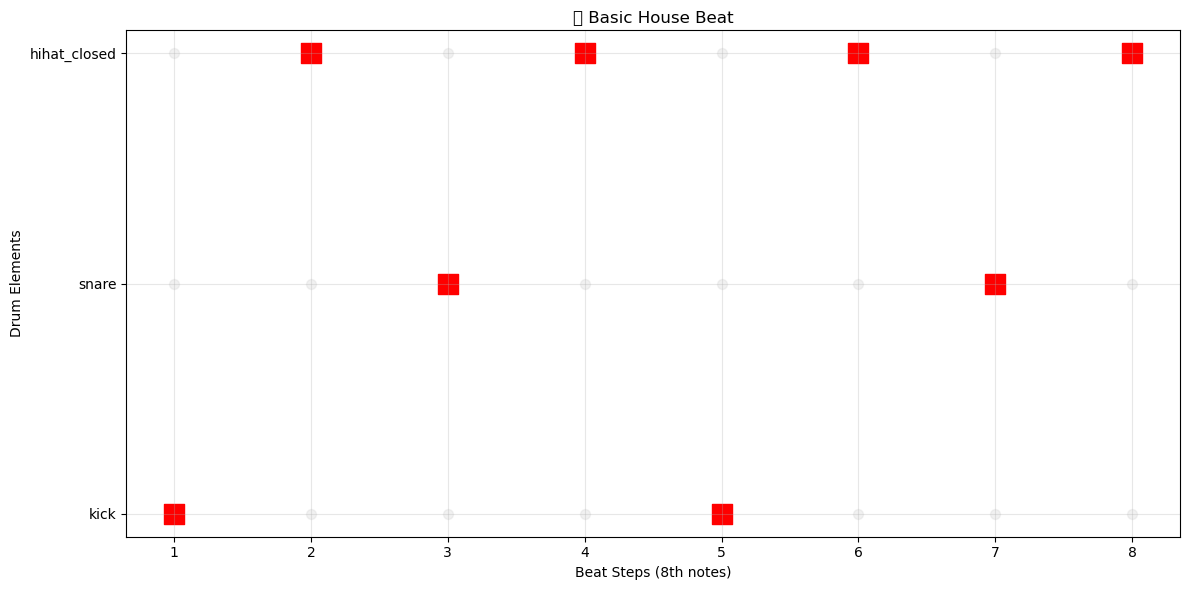


🎵 House beat created! Listen to the classic 4/4 pattern:
🥁 Playing: 🏠 Basic House Beat (128 BPM)
⏱️ Duration: 1.9 seconds
🔊 Peak volume: -6.0 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


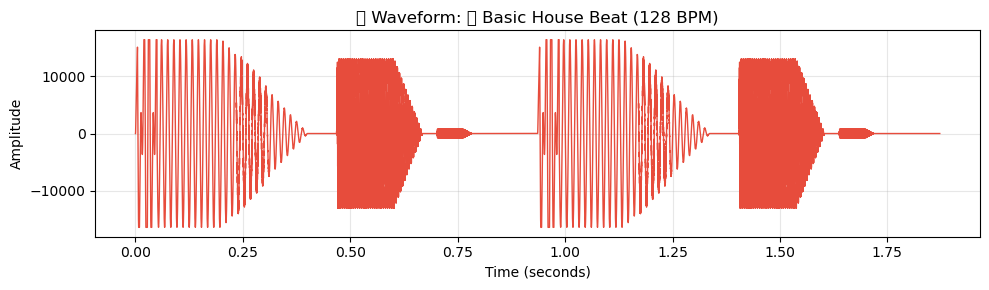

In [4]:
# 🎵 BEAT PROGRAMMING ENGINE
# Create rhythm patterns using our drum kit!

print("🎼 Building beat programming engine...")

def create_beat_pattern(pattern_dict, bpm=120, pattern_length=8):
    """Create a beat from pattern dictionary
    
    pattern_dict example:
    {
        'kick': [1, 0, 0, 0, 1, 0, 0, 0],
        'snare': [0, 0, 1, 0, 0, 0, 1, 0],
        'hihat': [1, 1, 1, 1, 1, 1, 1, 1]
    }
    
    1 = drum plays, 0 = silence
    """
    
    # Calculate timing
    beat_duration = int(60 / bpm * 1000)  # Duration of one beat in ms
    step_duration = beat_duration // 2    # 8th note duration (2 steps per beat)
    total_duration = step_duration * pattern_length
    
    # Start with silence
    final_beat = AudioSegment.silent(duration=total_duration)
    
    # Add each drum element
    for drum_name, pattern in pattern_dict.items():
        if drum_name in drum_kit:
            drum_sound = drum_kit[drum_name]
            
            # Add drum hits according to pattern
            for step, hit in enumerate(pattern):
                if hit == 1:  # Drum should play
                    position = step * step_duration
                    final_beat = final_beat.overlay(drum_sound, position=position)
    
    return final_beat

def visualize_pattern(pattern_dict, title="Beat Pattern"):
    """Visualize a beat pattern as a grid"""
    plt.figure(figsize=(12, 6))
    
    drum_names = list(pattern_dict.keys())
    num_drums = len(drum_names)
    pattern_length = len(list(pattern_dict.values())[0])
    
    for i, drum_name in enumerate(drum_names):
        pattern = pattern_dict[drum_name]
        
        for step, hit in enumerate(pattern):
            if hit == 1:
                plt.scatter(step, i, s=200, c='red', marker='s')
            else:
                plt.scatter(step, i, s=50, c='lightgray', marker='o', alpha=0.3)
    
    plt.yticks(range(num_drums), drum_names)
    plt.xticks(range(pattern_length), [f'{i+1}' for i in range(pattern_length)])
    plt.xlabel('Beat Steps (8th notes)')
    plt.ylabel('Drum Elements')
    plt.title(f'🥁 {title}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✅ Beat programming engine ready!")
print("🎼 You can now create beats using pattern arrays!")

# EXAMPLE: Basic house beat
house_pattern = {
    'kick': [1, 0, 0, 0, 1, 0, 0, 0],
    'snare': [0, 0, 1, 0, 0, 0, 1, 0],
    'hihat_closed': [0, 1, 0, 1, 0, 1, 0, 1]
}

print("\n🏠 Creating basic house beat pattern...")
visualize_pattern(house_pattern, "Basic House Beat")

house_beat = create_beat_pattern(house_pattern, bpm=128)
print("\n🎵 House beat created! Listen to the classic 4/4 pattern:")
play_beat(house_beat, "🏠 Basic House Beat (128 BPM)")

## 🏝️ LESSON 2: Caribbean Rhythm Patterns

Now let's create authentic Caribbean rhythms! Each style has its own characteristic pattern and feel.

### 🎵 **Caribbean Styles:**
- **Calypso:** Storytelling rhythm, relaxed feel (100-120 BPM)
- **Soca:** High-energy carnival music (130-140 BPM)
- **Reggae:** Off-beat emphasis, laid-back groove (80-90 BPM)

### 🥁 **Key Characteristics:**
- **Syncopation:** Emphasis on off-beats
- **Steel Pan:** Melodic percussion elements
- **Cultural Authenticity:** Patterns that honor tradition

Let's program these authentic Caribbean grooves!

🌴 Creating Caribbean rhythm patterns...
🎵 CALYPSO PATTERN:


/tmp/ipykernel_4532/1882808124.py:63: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


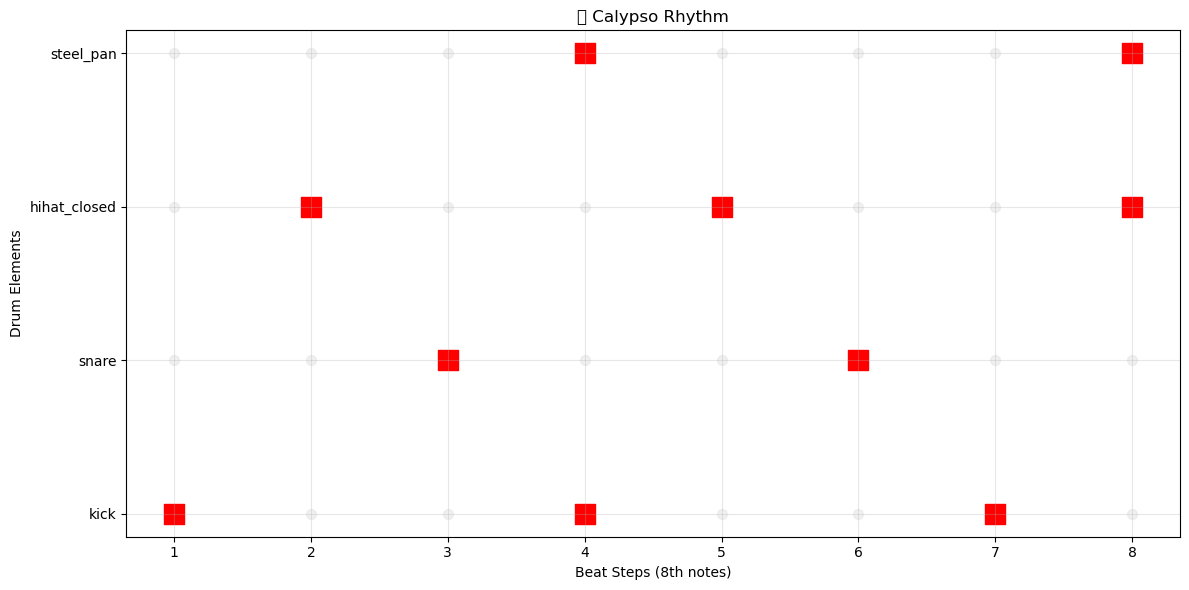

🏝️ Listen to this relaxed calypso groove:
🥁 Playing: 🎵 Calypso Beat (110 BPM)
⏱️ Duration: 2.2 seconds
🔊 Peak volume: -1.8 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


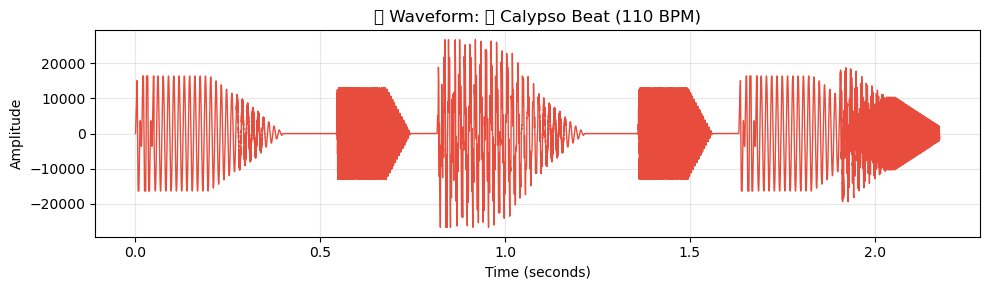


💃 SOCA PATTERN:


/tmp/ipykernel_4532/1882808124.py:63: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


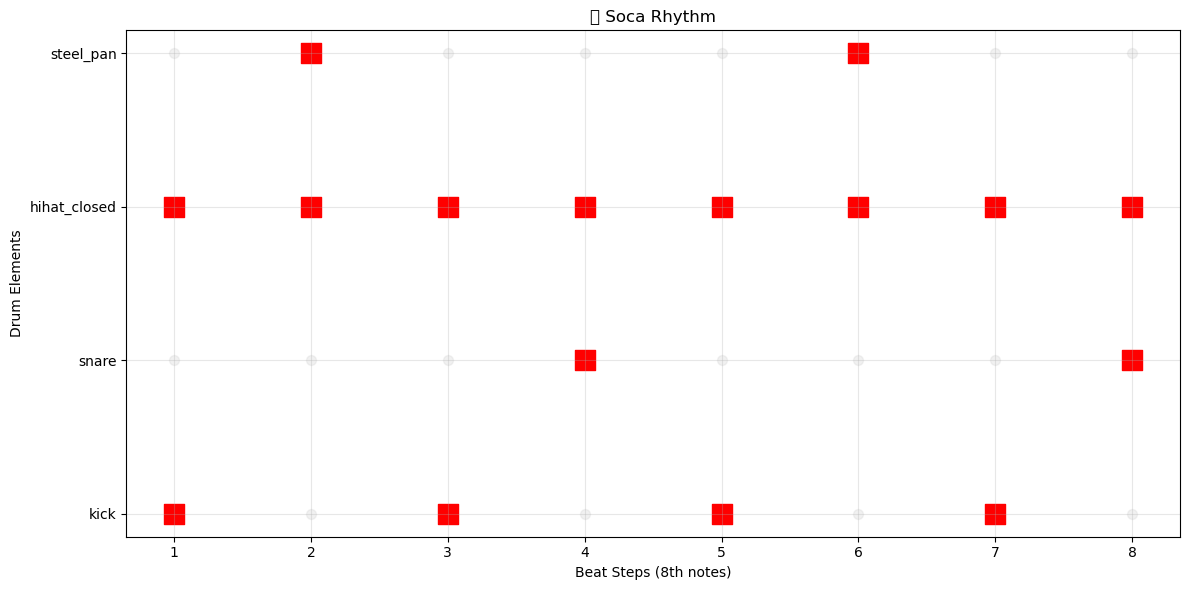

🎉 Listen to this high-energy soca groove:
🥁 Playing: 💃 Soca Beat (135 BPM)
⏱️ Duration: 1.8 seconds
🔊 Peak volume: -1.4 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 128131 (\N{DANCER}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128131 (\N{DANCER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


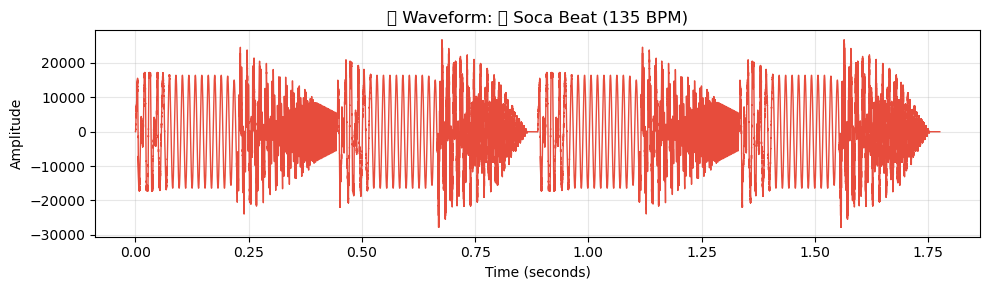


🎺 REGGAE PATTERN:


/tmp/ipykernel_4532/1882808124.py:63: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


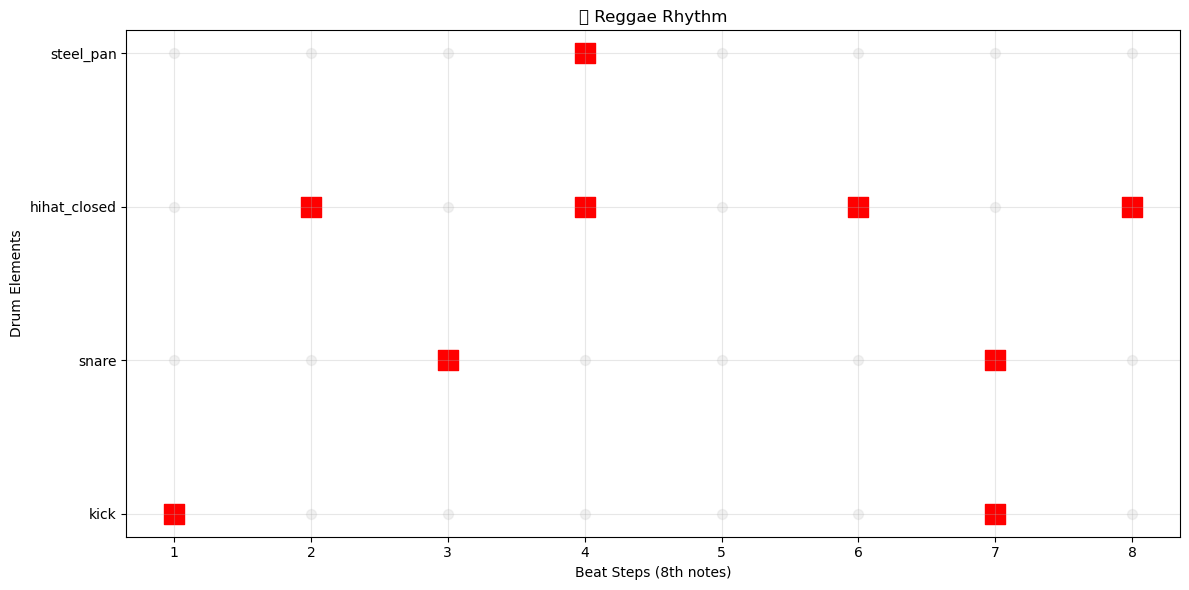

🎺 Listen to this laid-back reggae groove:
🥁 Playing: 🎺 Reggae Beat (85 BPM)
⏱️ Duration: 2.8 seconds
🔊 Peak volume: -0.9 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127930 (\N{TRUMPET}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127930 (\N{TRUMPET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


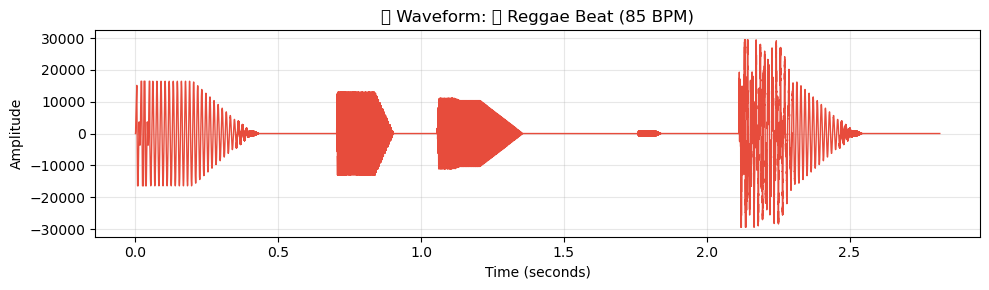


✨ Notice how each style has its own personality!
🎼 Calypso: Relaxed and storytelling
💃 Soca: High-energy and driving
🎺 Reggae: Off-beat and laid-back


In [5]:
# 🏝️ CARIBBEAN RHYTHM PATTERNS
# Create authentic island beats!

print("🌴 Creating Caribbean rhythm patterns...")

# CALYPSO PATTERN - relaxed storytelling rhythm
calypso_pattern = {
    'kick': [1, 0, 0, 1, 0, 0, 1, 0],
    'snare': [0, 0, 1, 0, 0, 1, 0, 0],
    'hihat_closed': [0, 1, 0, 0, 1, 0, 0, 1],
    'steel_pan': [0, 0, 0, 1, 0, 0, 0, 1]
}

print("🎵 CALYPSO PATTERN:")
visualize_pattern(calypso_pattern, "Calypso Rhythm")

calypso_beat = create_beat_pattern(calypso_pattern, bpm=110)
print("🏝️ Listen to this relaxed calypso groove:")
play_beat(calypso_beat, "🎵 Calypso Beat (110 BPM)")

# SOCA PATTERN - high-energy carnival rhythm
soca_pattern = {
    'kick': [1, 0, 1, 0, 1, 0, 1, 0],
    'snare': [0, 0, 0, 1, 0, 0, 0, 1],
    'hihat_closed': [1, 1, 1, 1, 1, 1, 1, 1],
    'steel_pan': [0, 1, 0, 0, 0, 1, 0, 0]
}

print("\n💃 SOCA PATTERN:")
visualize_pattern(soca_pattern, "Soca Rhythm")

soca_beat = create_beat_pattern(soca_pattern, bpm=135)
print("🎉 Listen to this high-energy soca groove:")
play_beat(soca_beat, "💃 Soca Beat (135 BPM)")

# REGGAE PATTERN - off-beat emphasis
reggae_pattern = {
    'kick': [1, 0, 0, 0, 0, 0, 1, 0],
    'snare': [0, 0, 1, 0, 0, 0, 1, 0],
    'hihat_closed': [0, 1, 0, 1, 0, 1, 0, 1],  # Off-beat emphasis
    'steel_pan': [0, 0, 0, 1, 0, 0, 0, 0]
}

print("\n🎺 REGGAE PATTERN:")
visualize_pattern(reggae_pattern, "Reggae Rhythm")

reggae_beat = create_beat_pattern(reggae_pattern, bpm=85)
print("🎺 Listen to this laid-back reggae groove:")
play_beat(reggae_beat, "🎺 Reggae Beat (85 BPM)")

print("\n✨ Notice how each style has its own personality!")
print("🎼 Calypso: Relaxed and storytelling")
print("💃 Soca: High-energy and driving")
print("🎺 Reggae: Off-beat and laid-back")

🎯 Time to create YOUR signature Caribbean beat!
🎵 Your tempo: 115 BPM

🎨 YOUR CUSTOM PATTERN:


/tmp/ipykernel_4532/1882808124.py:63: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


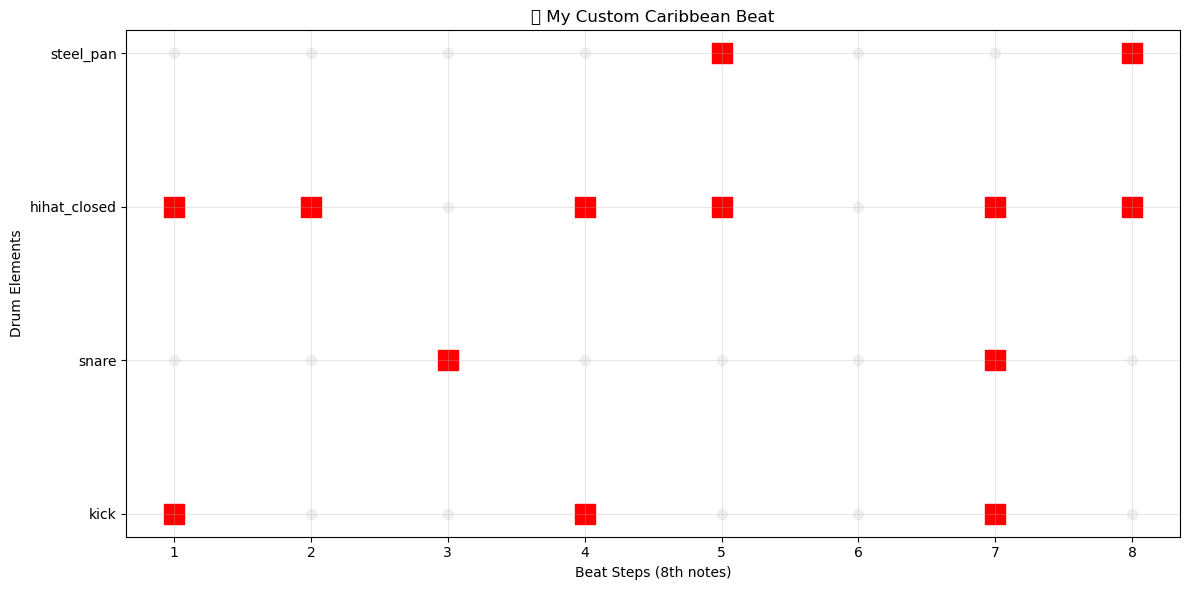


🎵 Your custom beat created at 115 BPM!
🥁 Playing: 🎨 My Custom Caribbean Beat (115 BPM)
⏱️ Duration: 2.1 seconds
🔊 Peak volume: -0.7 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


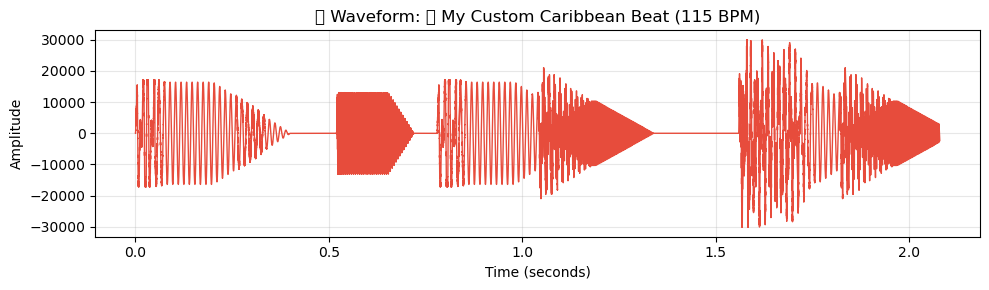


🔄 Extended version (3 repetitions):
🥁 Playing: 🎵 Extended Custom Beat
⏱️ Duration: 6.2 seconds
🔊 Peak volume: -0.7 dBFS


/tmp/ipykernel_4532/3471809846.py:34: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


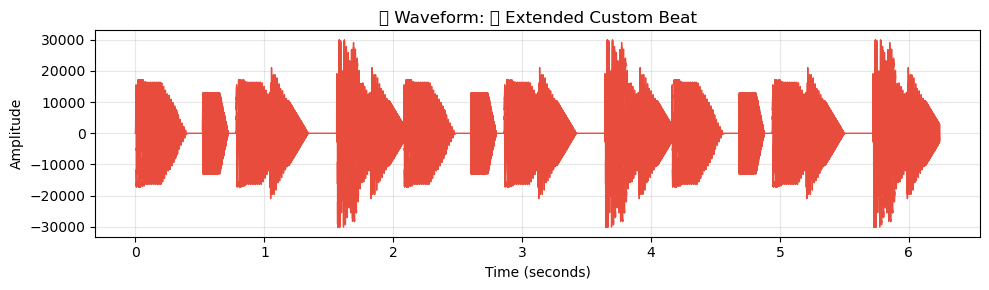


🧪 CREATIVE CHALLENGES:
   🎛️ Change the numbers in my_pattern arrays above
   🕐 Try different BPM values (80=slow, 100=medium, 130=fast)
   🥁 Focus on kick drum for the foundation
   📀 Use snare for accent and structure
   🔔 Hi-hats add groove and texture
   🎵 Steel pan adds Caribbean character

💾 Your signature beat saved for later use!


In [6]:
# 🎨 YOUR TURN: Create Your Own Caribbean Beat!
# Experiment with different patterns and BPM!

print("🎯 Time to create YOUR signature Caribbean beat!")

# EXPERIMENT 1: Try different BPM values
my_bpm = 115  # Try values between 80-140
print(f"🎵 Your tempo: {my_bpm} BPM")

# EXPERIMENT 2: Create your own pattern
# Each array has 8 steps (2 measures of music)
# 1 = drum plays, 0 = silence

my_pattern = {
    'kick': [1, 0, 0, 1, 0, 0, 1, 0],     # Try different kick patterns
    'snare': [0, 0, 1, 0, 0, 0, 1, 0],    # Experiment with snare placement
    'hihat_closed': [1, 1, 0, 1, 1, 0, 1, 1],  # Add groove with hi-hats
    'steel_pan': [0, 0, 0, 0, 1, 0, 0, 1]      # Caribbean flavor!
}

print("\n🎨 YOUR CUSTOM PATTERN:")
visualize_pattern(my_pattern, "My Custom Caribbean Beat")

my_beat = create_beat_pattern(my_pattern, bpm=my_bpm)
print(f"\n🎵 Your custom beat created at {my_bpm} BPM!")
play_beat(my_beat, f"🎨 My Custom Caribbean Beat ({my_bpm} BPM)")

# EXPERIMENT 3: Create a longer version by repeating
extended_beat = my_beat + my_beat + my_beat  # 3 repetitions
print("\n🔄 Extended version (3 repetitions):")
play_beat(extended_beat, "🎵 Extended Custom Beat")

# CREATIVE CHALLENGE: Try different combinations!
print("\n🧪 CREATIVE CHALLENGES:")
print("   🎛️ Change the numbers in my_pattern arrays above")
print("   🕐 Try different BPM values (80=slow, 100=medium, 130=fast)")
print("   🥁 Focus on kick drum for the foundation")
print("   📀 Use snare for accent and structure")
print("   🔔 Hi-hats add groove and texture")
print("   🎵 Steel pan adds Caribbean character")

# Save your creation
my_signature_beat = extended_beat
print("\n💾 Your signature beat saved for later use!")

## 🎓 Beat Machine Lab Complete!

**Congratulations!** You've successfully completed the Beat Machine laboratory and created authentic Caribbean rhythms.

### 🏆 **Skills You've Mastered:**
- **Digital Drum Programming:** Creating drum sounds from synthesis
- **Caribbean Rhythm Patterns:** Authentic Calypso, Soca, and Reggae beats
- **Beat Programming:** Pattern arrays and timing systems
- **Cultural Music:** Understanding Caribbean musical traditions
- **Audio Visualization:** Waveform analysis and pattern display

### 🎯 **Tomorrow's Preview:**
Your beats will become the foundation for AI-generated melodies! We'll use services like Suno AI and Udio to create complete songs based on your rhythmic patterns.

### 💾 **What You've Created:**
- Professional drum kit sounds
- Multiple Caribbean rhythm styles
- Your personal signature beat
- Audio programming skills

**Keep grooving and celebrating your heritage through rhythm!** 🥁✨